In [13]:
# tree time
# https://github.com/baymlab/2023_QuinonesOlvera-Owen/blob/main/figures/Fig2/large_tree/large_tree.ipynb

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
clustal_cmd = f'clustalo -i data/fastas/RVT.fa -o  data/fastas/RVT.msa.fasta --outfmt=fa'

print(clustal_cmd)

clustalo -i data/fastas/RVT.fa -o  data/fastas/RVT.msa.fasta --outfmt=fa


In [15]:
# but does this even work?? everything is permuted and everything so idk

In [16]:
iqtree_cmd = f'iqtree -st DNA -nt AUTO -m MFP -bb 1000 -alrt 1000 -s data/fastas/RVT.msa.fasta'

print(iqtree_cmd)

iqtree -st DNA -nt AUTO -m MFP -bb 1000 -alrt 1000 -s data/fastas/RVT.msa.fasta


In [17]:
# these run in defensefinder, then I ran the commands in defensefinder

In [19]:
esl_cmd = f'esl-alipid data/fastas/RVT.msa.fasta > data/fastas/RVT_pid.tbl'
!{esl_cmd}

In [22]:
alphatv_pid = 'data/fastas/RVT_pid.tbl'

df1 = pd.read_csv(alphatv_pid, delim_whitespace=True, comment='#', header=None)
df1.columns = ['seq1', 'seq2', 'p_id', 'nid', 'denomid', 'p_match', 'n_match', 'denommatch']
df1 = df1.sort_values('p_id', ascending=False)

In [24]:
# fill other values to make symetrical matrix
df2 = df1.rename(columns={'seq1': 'a', 'seq2': 'b'})
df2 = df2.rename(columns={'a': 'seq2', 'b': 'seq1'})

df_sym = pd.concat([df1, df2])

In [26]:
df_sym.sort_values('p_id')
m = df_sym.pivot_table(index='seq1', columns='seq2', values='p_id', fill_value=100)


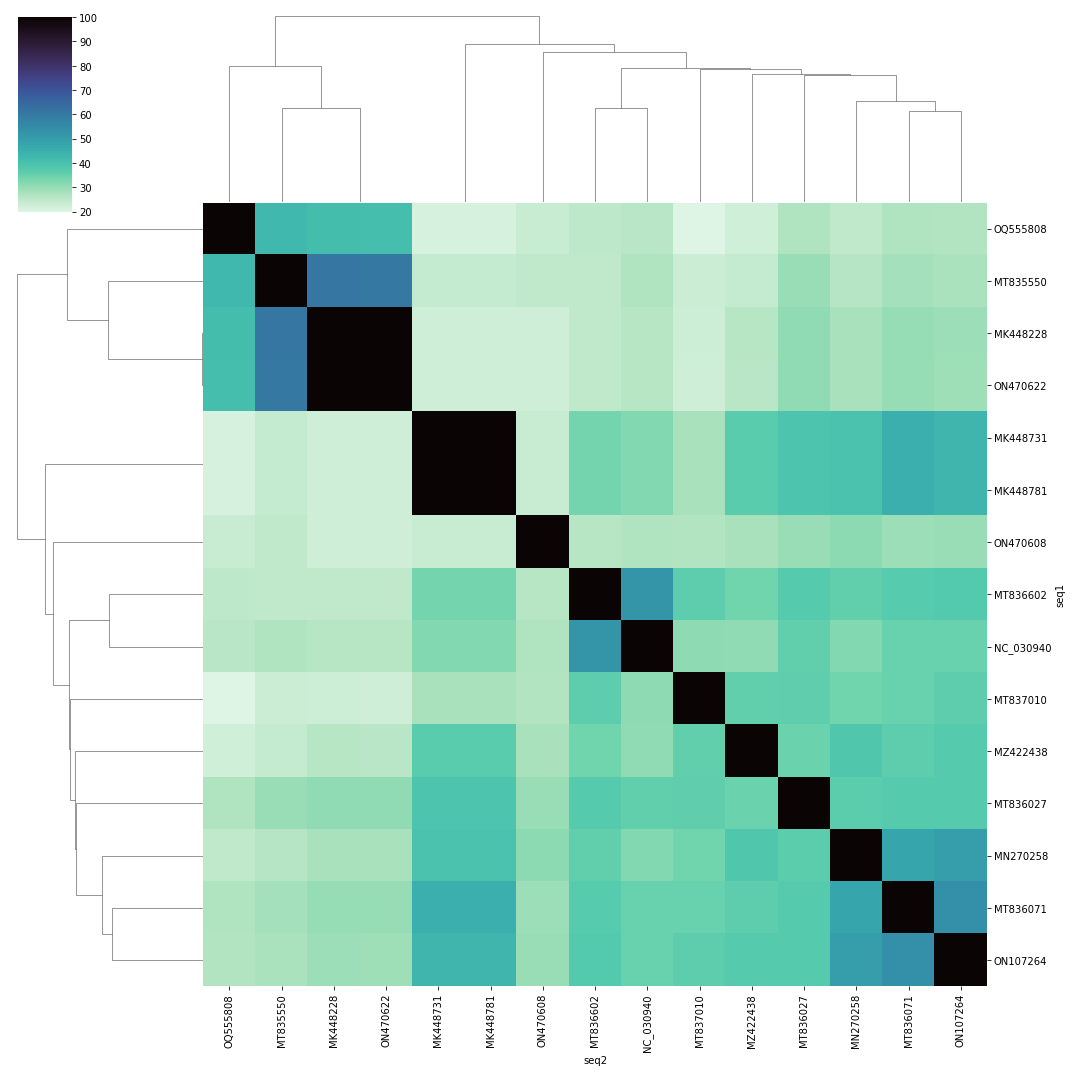

In [28]:
g = sns.clustermap(m, cmap="mako_r", figsize=(15, 15))


In [31]:
g.savefig('data/fastas/pid.png')

In [32]:
g